In [1]:
import yfinance as yf

data = yf.download(tickers = "GLD", start="2017-12-01", end="2023-06-16", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [2]:
data = data.reset_index('Date', inplace=False)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
from sklearn.ensemble import RandomForestRegressor

In [4]:
# 3. Scaler data
#scaler=MinMaxScaler(feature_range=(0,1))
#df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [7]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
#y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
#y_pred_val =  model.predict(n_periods=len(y_val))

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

best_score = float('-inf')
best_params = {}

for n_estimators in [100, 200, 500, 1000]:
    for max_depth in [5, 10, 15, 20]:
        for random_state in [1, 42, 77, 123]:
            model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, max_depth=max_depth)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            score = model.score(x_test, y_test)  # R-squared score

            if score > best_score:
                best_score = score
                best_params = {
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'random_state': random_state
                }

print("Best parameters:", best_params)

Best parameters: {'n_estimators': 1000, 'max_depth': 5, 'random_state': 1}


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [10]:
y_pred = model.predict(x_test)

In [11]:
y_pred_val =  model.predict(x_val)

In [12]:
last_index =  data.index[-1]
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[166.98014055 166.98014055 166.98014055 166.98014055 166.98014055
 166.98014055 166.98014055 166.98014055 166.98014055 166.98014055
 166.98014055 166.98014055 166.98014055 166.98014055 166.98014055
 166.98014055 166.98014055 166.98014055 166.98014055 166.98014055
 166.98014055 166.98014055 166.98014055 166.98014055 166.98014055
 166.98014055 166.98014055 166.98014055 166.98014055 166.98014055]


In [13]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 12.926271731732635
Testing RMSE: 8.453680477912323


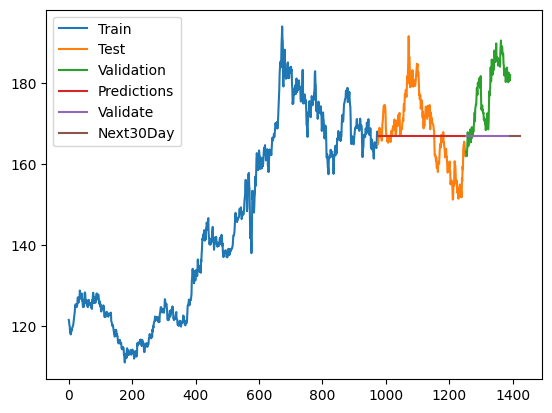

In [14]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate','Next30Day'])
plt.show()

## X: 'Open', 'High', 'Low', 'Close', 'Volume'

## y= 'Adj Close'

In [15]:
import yfinance as yf

df = yf.download(tickers = "GC=F", start="2017-12-01", end="2023-06-08", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [16]:
df = df.reset_index('Date', inplace=False)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [18]:
# 4. Chia train test
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [19]:
X_train= train_data[['Open', 'High', 'Low', 'Volume']]
y_train= train_data['Close']

X_test= test_data[['Open', 'High', 'Low','Volume']]
y_test= test_data['Close']

X_val= val_data[['Open', 'High', 'Low', 'Volume']]
y_val= val_data['Close']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
X_val = scale.transform(X_val)

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[1774.12843749 1796.2670504  1776.32629257 1773.71045252 1776.32629257
 1778.12827519 1786.00035746 1801.68357969 1802.06440576 1801.68357969
 1794.17674708 1802.06440576 1780.8482234  1791.26416227 1791.26416227
 1774.59676074 1783.34379228 1802.67894664 1816.04330414 1833.24297662
 1842.48606413 1863.40486445 1860.23625895 1872.42118934 1858.84141556
 1872.38892549 1864.69233073 1858.13146611 1835.50267075 1791.26416227
 1786.71148561 1791.64498834 1791.26416227 1786.34302149 1782.79554763
 1777.91033969 1774.12843749 1776.32629257 1781.92298887 1777.91033969
 1781.92298887 1777.91033969 1776.32629257 1791.26416227 1776.32629257
 1763.15742129 1788.53211619 1812.40927349 1796.06502097 1791.26416227
 1801.68357969 1805.5548971  1812.78837612 1812.6119848  1802.06440576
 1802.47623533 1816.27580848 1804.97010688 1802.81987163 1814.74049698
 1791.26416227 1792.20856685 1795.08043709 1812.6119848  1815.5050954
 1814.48112591 1814.48112591 1814.48112591 1837.00541154 1839.63430727
 1837.4

In [22]:
validate = model.predict(X_val)
print(validate)
print(validate.shape)

[1777.91033969 1766.52097418 1755.81875627 1741.72069451 1743.00210996
 1745.79051184 1756.72632726 1746.84747458 1748.95170523 1755.80532228
 1782.38653447 1789.30585835 1782.3136919  1776.32629257 1776.32629257
 1787.18842516 1802.06440576 1781.92298887 1793.17981128 1802.63735754
 1785.02666004 1781.92298887 1791.26416227 1802.29812057 1814.48112591
 1802.29812057 1799.02785782 1813.63595429 1811.99744392 1812.6119848
 1814.48112591 1838.91347571 1853.24125156 1843.16420524 1844.31839683
 1874.82583533 1878.99079991 1878.94825902 1890.31004117 1900.8889812
 1916.63410466 1914.63057929 1913.81021924 1923.79245238 1923.16056045
 1922.18742475 1939.05130068 1945.59230142 1939.05130068 1927.70546627
 1932.9601726  1908.86068654 1938.42483115 1937.04737108 1881.13370445
 1874.61832746 1873.52346227 1880.10816517 1869.52275685 1858.62005777
 1858.3976184  1858.07638934 1837.40413513 1837.40413513 1837.23791588
 1838.11155092 1835.0153577  1816.27580848 1813.0244809  1813.63902178
 1815.27

In [23]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))

Mean Absolute Error: 6.9284
Mean Squared Error: 79.2042
Root Mean Squared Error: 8.8997
(R^2) Score: 0.9899


In [24]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_val, validate), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_val, validate), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_val, validate)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_val, validate), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% , Test Score : {model.score(X_test, y_test) * 100:.2f}% and Validate Score : {model.score(X_val, y_val) * 100:.2f}% using Random forest Regressor.')

Mean Absolute Error: 7.7556
Mean Squared Error: 100.9218
Root Mean Squared Error: 10.046
(R^2) Score: 0.9866
Train Score : 99.93% , Test Score : 98.99% and Validate Score : 98.66% using Random forest Regressor.


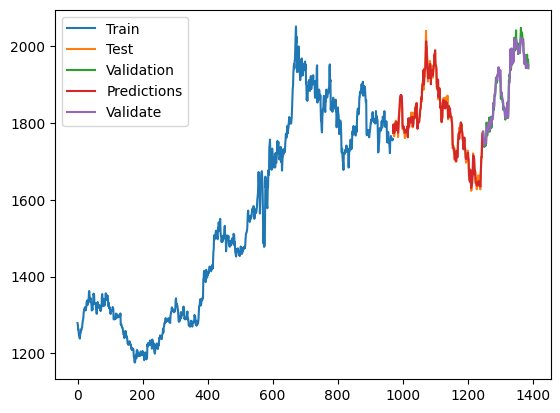

In [25]:
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, predict)
plt.plot(val_data.index, validate)
plt.legend(['Train', 'Test', 'Validation', 'Predictions','Validate'])
plt.show()